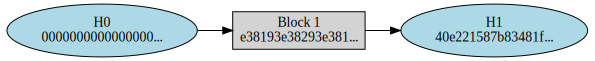

In [3]:
import hashlib
from graphviz import Digraph
from IPython.display import display, SVG

# メッセージとブロック処理用定数
text = "こんにちは、世界"
BLOCK_SIZE = 64  # SHA-256のブロックサイズ（512ビット）

def pad(message_bytes):
    """SHA-256風のパディング"""
    l = len(message_bytes)
    message_bytes += b'\x80'  # 1ビット追加
    while (len(message_bytes) + 8) % BLOCK_SIZE != 0:
        message_bytes += b'\x00'
    message_bytes += (l * 8).to_bytes(8, byteorder='big')  # 元の長さ（ビット）を追加
    return message_bytes

def compression_function(h, block):
    """SHA-256風の圧縮関数（簡易版）"""
    return hashlib.sha256(h + block).digest()

# 1. メッセージをエンコードしてパディング
message_bytes = pad(text.encode('utf-8'))
initial_state = b'\x00' * 32  # 初期ハッシュ値（IV）

# 2. ブロック分割と中間ハッシュ計算
states = [initial_state]
blocks = []

for i in range(0, len(message_bytes), BLOCK_SIZE):
    block = message_bytes[i:i+BLOCK_SIZE]
    blocks.append(block)
    h = compression_function(states[-1], block)
    states.append(h)

# 3. Graphvizで可視化
dot = Digraph(format='svg')
dot.attr(rankdir='LR')

for i in range(len(blocks)):
    block_label = f"Block {i+1}\n{blocks[i].hex()[:16]}..."
    state_label = f"H{i}\n{states[i].hex()[:16]}..."
    next_state_label = f"H{i+1}\n{states[i+1].hex()[:16]}..."

    dot.node(f"b{i}", block_label, shape='box', style='filled', fillcolor='lightgray')
    dot.node(f"h{i}", state_label, shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node(f"h{i+1}", next_state_label, shape='ellipse', style='filled', fillcolor='lightblue')

    dot.edge(f"h{i}", f"b{i}")
    dot.edge(f"b{i}", f"h{i+1}")

# 4. 表示（Jupyter上でSVGとして）
display(SVG(dot.pipe(format='svg')))
